# Hito 1 Editado: Estudio, análisis y pre-procesamiento de ataques terroristas en el mundo.

**Profesores:** 

* Felipe Bravo-Marquez M.
* Hernán Sarmiento A.

**Auxiliares:**
* Jorge Ortiz F.
* Cinthia Sánchez M.

**Fecha:** 13 de Abril, 2022

**Nombres:** 
* Augusto Aguayo B.
* Nicolás Brandstetter N.
* Nicolás Isla F.
* Sebastián Moreno M.
* Jordan Pérez D.


## Introducción

### Contexto
El terrorismo es algo que lamentablemente ha estado en nuestra sociedad desde hace décadas. Se define terrorismo como el uso sistemático del terror usado por distintas organizaciones o individuos con el fin de promocionar sus objetivos, ya sean políticos, económicos, religiosos o personales entre otros. Día a día se escuchan noticias referidas al tema en distintos lados del mundo, por lo que es interesante tener a disposición el registro histórico de estos eventos. Su estudio ayudaría a descubrir patrones de comportamientos o encontrar nueva información sobre eventos pasados para aprender de ellos, con la motivación de poder mejorar políticas de prevención de estos sucesos, que muchas veces significan pérdidas de vidas, destrucción de infraestructura, flora y/o fauna.

### Motivación
La principal motivación que lleva a escoger y estudiar este Data Set es encontrar y comprender patrones existentes en los ataques terroristas, visualizar la evolución de estos a lo largo de los años y encontrar tendencias y por ultimo, estudiar las implicancias existentes en los ataques terroristas, ya sea economica, política y socialmente. Esto dado que al tener mas información de esto, se podrían establecer protocolos de prevención.

## Limpieza del dataset
El dataset original, descargado de [Global Terrorism Database](https://www.start.umd.edu/gtd/), fue convertido a CSV mediante el siguiente script:

In [ ]:
import pandas as pd
#df_original = pd.read_excel('globalterrorismdb_0221dist.xlsx')
#df_original.to_csv('globalterrorismdb_0221dist.csv', index=False)

Para luego ser leído como:

In [ ]:
df = pd.read_csv('globalterrorismdb_0221dist.csv', low_memory=False)

FileNotFoundError: ignored

Una vez cargado, se limpian los datos:

Eliminando las columnas que no interesan para el estudio:

In [ ]:
# Remove irrelevant columns for the study
to_remove = [   
                'approxdate',                                                                           # Estimated date of the incident, when it is not certain.
                'country', 'region',                                                                    # Codes for country and region.
                'summary',                                                                              # Descriptive text about the incident.
                'doubtterr',                                                                            # Flags if there is doubt about this being a terrorist attack.
                'alternative', 'alternative_txt',                                                       # If there was doubt (doubtterr flag), proposes an alternative.
                'multiple',                                                                             # If corresponds with a series of related incidents, redundant with information in 'related' column.
                'attacktype1', 'attacktype2', 'attacktype3',                                            # Codes for attack types.
                'targtype1', 'targsubtype1',                                                            # Codes for target type in target 1.
                'target1',                                                                              # Descriptive text for target 1.
                'natlty1',                                                                              # Codes for nationality of target 1.
                'targtype2', 'targsubtype2',                                                            # Applies the same last 3 lines for target 2 and 3.
                'target2',                                                          
                'natlty2',                                          
                'targtype3', 'targsubtype3',                        
                'target3',                                                          
                'natlty3',
                'gsubname', 'gsubname2', 'gsubname3',                                                   # Subdivision of group 1, 2 o 3 that has claimed the incident.
                'guncertain1', 'guncertain2', 'guncertain3',                                            # Flags if theres uncertainty about group 1, 2 or 3 taking part in the incident.
                'individual',                                                                           # Flags if the perpetrators do not correspond to a terrorist group, redudant by 'gname' column.
                'nperps',                                                                               # Number of perpetrators.
                'claimed', 'claimmode', 'claimmode_txt',                                                # Flags and codes/descriptive text about group 1 claiming the incident.
                'claim2', 'claimmode2', 'claimmode2_txt',                                               # Same for group 2 and 3.
                'claim3', 'claimmode3', 'claimmode3_txt',
                'compclaim',                                                                            # Flags if several groups claims the incident.
                'weaptype1', 'weapsubtype1',                                                            # Codes for weapon 1 type used by the perpetrators, below are codes for weapon 2, 3 and 4.
                'weaptype2', 'weapsubtype2',
                'weaptype3', 'weapsubtype3',
                'weaptype4', 'weapsubtype4',
                'weapdetail',                                                                           # Descriptive text about the weapons used by the perpetrators.
                'nkillus',  'nwoundus',                                                                 # Death and wounded toll, only taking US citizens into account.
                'propvalue', 'propcomment',                                                             # Damage to properties in USD (present in only few cases), and descriptive text about the damage.
                'nhostkidus',                                                                           # Number of hostages taken, only taking US citizens into account.
                'divert',                                                                               # Country that the kidnappers diverted after the resolution of the incident.
                'kidhijcountry',                                                                        # Country where the hostage incident was resolved.
                'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote',       # Information about the ransom involving the hostage incident.
                'hostkidoutcome',                                                                       # Code for the outcome of the hostages.
                'addnotes',                                                                             # Descriptive text for additional notes about the incident.
                'scite1', 'scite2', 'scite3', 'dbsource',                                               # Information sources for the incident.
                'INT_MISC', 'INT_ANY',                                                                  # Flags if the incidents corresponds to an International misc. or any International type.
            ]

df = df.loc[:, ~df.columns.isin(to_remove)]

Luego, solo se consideran los incidentes ocurridos desde 1998 en adelante, puesto que desde este año se incluyen sistemáticamente muchos atributos en el dataset, e involucra tendencias actuales del terrorismo.

También, se remueven entradas que tengan mal formateada la fecha.

In [ ]:
# Remove incidents: 1.  Ocurred before 1998
#                   2.  With day/month set as 0
df = df[(df.iyear >= 1998) & (df.iday > 0) & (df.imonth > 0)]

Se remueven incidentes ocurridos en contextos de guerra, puesto que no son parte del foco de este estudio.

In [ ]:
# Remove incidents ocurred within context of war
df = df[df.crit3 != 0]
df = df.loc[:, df.columns!='crit3']

Se agrega según las columnas de año, mes y día (`iyear`, `imonth` y `iday` respectivamente) una columna `timestamp`, que indica la fecha de inicio del incidente.

También, según la columna `extended` y `resolution`, se agrega una columna `end_date`, que contiene la fecha de termino del incidente.

In [ ]:
import datetime
import numpy as np

# Merge iyear, imonth, iday column into a timestamp column within a timestamp format
df['timestamp'] = df[['iyear', 'imonth', 'iday']].apply(lambda s: datetime.datetime(*s), axis=1)
df = df.loc[:, ~df.columns.isin(['iyear', 'imonth', 'iday'])]

# Merge extended, resolution columns into end_date and duration (days) column
end_date  = pd.to_datetime(df['resolution'], format='%Y-%m-%d')
end_date = np.where(pd.isnull(df['resolution']), df['timestamp'], end_date)
df['end_date'] = end_date
df['duration'] = (df['end_date'] - df['timestamp']).apply(lambda s: s.days + 1)
df = df.loc[:, ~df.columns.isin(['extended', 'resolution'])]

# Filter out incidents where duration has a non positive value
df = df[df.duration > 0]

Se agrega una columna `perpcapture` según la columna `nperpcap`, que indica la captura de perpetradores del incidente, donde:

* `na`: No hay información de capturas.
* `1`: Hubieron perpetradores capturados.
* `0`: No hubieron perpetradores capturados.

In [ ]:
# Add a new column: perpcapture that flags when there are captured perpetrators
# where:    na. unknown
#            0. no perpetrator captured
#            1. at least one perpetrator captured
perpcapture = np.where(df.nperpcap == 0, 0, np.nan)
perpcapture = np.where(df.nperpcap > 0, 1, perpcapture)
df['perpcapture'] = perpcapture
df = df.loc[:, df.columns!='nperpcap']

Se agrega una columna `propdamage` según los datos de las columnas `property`, `propextent` y `propextent_txt`, que indica el daño a propiedades generado por el incidente, donde:

* `na`: No hay información de daño a propiedades.
* `0`: No hubo daños.
* `1`: Daños menores (costos $<$ 1 millón de USD)
* `2`: Daños mayores (1 millón $\leq$ costos $<$ 1000 millones de USD)
* `3`: Daños catastróficos (1000 millones de USD $\leq$ costos)

In [ ]:
df['propdamage'] = np.where(df.property == 0, 0, np.nan)
df['propdamage'] = np.where(df.propextent == 4, np.nan, df.propdamage)
df['propdamage'] = np.where(df.propextent == 3, 1, df.propdamage)
df['propdamage'] = np.where(df.propextent == 2, 2, df.propdamage)
df['propdamage'] = np.where(df.propextent == 1, 3, df.propdamage)
df = df.loc[:, ~df.columns.isin(['property', 'propextent', 'propextent_txt'])]

Reseteo de índices y se borra la columna creada `index`, que contiene los índices antiguos.


In [ ]:
# Reset indexes and delete the newly generated index column, containing the old indexes
df = df.reset_index()
df = df.loc[:, df.columns!='index']

Se eliminan las referencias a incidentes que han sido eliminados del dataset, y se agrega una columna `n_related` que indica cuantos incidentes relacionados hay para cada uno.

In [ ]:
# Ugly code to remove deleted references from related column
for i in range(len(df)):
    related_incidents_str = df.at[i, 'related']
    if pd.isna(related_incidents_str):
        df.at[i, 'related'] = ''
    else:
        related_incidents_initial = [int(event_id) for event_id in related_incidents_str.replace(' ', '').split(',')]
        
        related_incidents_final = []
        for event_id in related_incidents_initial:
            if event_id in df.eventid.values:
                related_incidents_final.append(event_id)

        df.at[i, 'related'] = ",".join([str(i) for i in related_incidents_final])


# Add a n_related column, displaying how many related incidents for each incident there are
n_related = np.where(df.related != '', df.related.apply(lambda s: len(s.split(','))), 0)
df['n_related'] = n_related

# Change blank values in related for nan
df.related = np.where(df.related == '', np.nan, df.related)

Reemplazo de los valores desconocidos por `na`.

In [ ]:
# Replace unknown values for n/a
columns_with_unknown_values = {
                                -9:         [
                                                'vicinity',
                                                'ishostkid', 'nhours',
                                                'INT_LOG', 'INT_IDEO'
                                            ],
                                -99:        [
                                                'nhostkid', 'nhours','ndays', 'nreleased'

                                            ],
                                'Unknown':  [
                                                'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt',
                                                'targtype1_txt', 'targtype2_txt', 'targtype3_txt',
                                                'gname',
                                                'motive',
                                                'weaptype1_txt', 'weaptype2_txt', 'weaptype3_txt', 'weaptype4_txt',
                                                'hostkidoutcome_txt'
                                            ]
                              }

for value in columns_with_unknown_values.keys():
    for column in columns_with_unknown_values[value]:
        df[column] = np.where(df[column] == value, np.nan, df[column])

Se agrega una columna `country_code` que indica el código del país en formato [ISO-3166-1](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) , el cual será util para algunas librerías para graficar mapas.

In [ ]:
import pycountry

# Add an ISO-3166-1 column with 3-letter country code for each entry, used to plot maps in certain libraries.
def search_country_code(country_name):
    try:
        return pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except:
        return 'UNK'

country_code_dict = {country:search_country_code(country) for country in df.country_txt.unique()}
df['country_code'] = df.country_txt.apply(lambda c: country_code_dict[c])

Reordenación las columnas del dataset.

In [ ]:
# Reorder columns
column_order = [
                    'eventid',
                    'timestamp', 'end_date', 'duration',
                    'country_txt', 'country_code', 'region_txt', 'provstate', 'city', 'location',
                    'latitude', 'longitude', 'specificity', 'vicinity',
                    'crit1', 'crit2',
                    'success', 'suicide',
                    'attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt',
                    'targtype1_txt', 'targsubtype1_txt', 'corp1', 'natlty1_txt',
                    'targtype2_txt', 'targsubtype2_txt', 'corp2', 'natlty2_txt',
                    'targtype3_txt', 'targsubtype3_txt', 'corp3', 'natlty3_txt',
                    'gname', 'gname2', 'gname3',
                    'motive',
                    'weaptype1_txt', 'weapsubtype1_txt',
                    'weaptype2_txt', 'weapsubtype2_txt',
                    'weaptype3_txt', 'weapsubtype3_txt',
                    'weaptype4_txt', 'weapsubtype4_txt',
                    'nkill', 'nkillter', 'nwound', 'nwoundte', 'perpcapture',
                    'ishostkid', 'nhostkid', 'nhours', 'ndays', 'hostkidoutcome_txt', 'nreleased',
                    'propdamage',
                    'INT_LOG', 'INT_IDEO',
                    'related', 'n_related'
               ]

df = df.reindex(columns=column_order)

Finalmente, se guarda el dataset ya limpio en un archivo `out.csv`.

In [ ]:
# Save the cleaned dataframe
#df.to_csv('out.csv', index=False, na_rep=np.nan)

* ### Dataset final
Luego de todo el filtrado de la sección 2.1 se llegó a un Dataframe con 115.998 filas.\
La descripción de cada columna del dataset filtrado se presenta a continuación:

* `eventid`: ID única relacionado al atentado.
* `timestamp`: Fecha de inicio del atentado
* `end_date`: Fecha de término del atentado
* `duration`: Duración en días del atentado
* `country_txt`: País en el que ocurre el incidente.
* `country_code`: Código identificador del país según la normativa [ISO_3166-1 alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3).
* `region_txt`: Región geográfica (continente/subcontinente) donde ocurre el incidente.
* `provstate`: Región administrativa subnacional de 1er orden en la que ocurre el evento.
* `city`: Ciudad donde ocurre el incidente.
* `location`: Texto descriptivo del lugar del atentado, en caso de haber más precisión.
* `latitude`: Latitud del lugar del atentado.
* `longitude`: Longitud del lugar del atentado.
* `specificity`: Escala del `1` al `5` con qué tan específico se tiene el lugar del ataque. `1` es que `lat`, `long` representa exactamente el lugar, mientras que `5` es que no se puede encontrar el lugar ni una referencia cercana del ataque, por lo que las coordenadas son aproximadas al centroide de la región administrativa más cercana.
* `vicinity`: Indica con `1` si el incidente ocurrió en las inmediaciones directas de la ciudad, `0` si ocurrió en el interior de la ciudad.
* `crit1`: Indica con `1` si el incidente fue de carácter político, religioso, económico o con objetivo social, `0` si no.
* `crit2`: Indica con `1` si el incidente fue con intención de intimidar, `0` si no.
* `success`: Indica con `1` si el ataque fue exitoso o `0` si no dependiendo del objetivo.
* `suicide`: Indica con `1` si el ataque fue suicida, `0` si no.
* `attacktype1_txt`: Jerarquía de forma de ataque que se usó de forma principal. Sus valores van del 1 al 9 con el siguiente orden: `Assassination`, `Hijacking`, `Kidnapping`, `Barricade Incident`, `Bombing/Explosion`, `Armed Assault`, `Unarmed Assault`, `Facility/Infrastructure Attack`, `Unknown`.
* `attacktype2_txt`: Jerarquía de forma de ataque secundaria según la misma escala que el punto 1.
* `attacktype3_txt`: Jerarquía de forma de ataque terciaria según la misma escala que el punto 1.
* `targtype1_txt`: Describe de forma general el contexto del ataque. Por ejemplo, si se atacó a un familiar de gobierno su ítem respectivo es “gobierno”. Tiene 22 categorías distintas.
* `targsubtype1_txt`: Contiene categorías para especificar más la categoría contenida en ‘targtype1_txt’.
* `corp1`: Entidad que es el objetivo del incidente.
* `natlty1_txt`: Nacionalidad del objetivo.
<br>Nota: Existen campos también para el objetivo 2 y 3.

* `gname`: Nombre del grupo que se atribuye el incidente.
* `gname2`: Nombre de un segundo grupo que se atribuye el incidente (en caso de haber).
* `gname3`: Nombre de un tercer grupo que se atribuye el incidente (en caso de haber).
* `motive`: Texto descriptivo, indica el motivo del ataque.
* `weaptype1_txt`: Corresponde al tipo de arma utilizada.
* `weapsubtype1_txt`: Si aplica, el subtipo de clasificación del arma utilizada.
<br>Nota: Existen campos también para el arma 2, 3 y 4.

* `nkill`: Indica el número total de muertos durante el incidente (incluyendo perpetradores).
* `nkillter`: Indica el número de muertos heridos durante el incidente.
* `nwound`: Indica el número total de heridos durante el incidente (incluyendo perpetradores).
* `nwoundte`: Indica el número de perpetradores heridos durante el incidente.
* `perpcapture`: Indica con un `1` si hubieron capturas a algún perpetrador, con `0` si no.
* `ishostkid`: Indica con un `1` si el incidente incluye alguna situación de secuestro, con un `0` si no.
* `nhostkid`: Es el número de secuestrados o personas tomadas como rehenes en el atentado.
* `nhour`s: Número de horas de la situación de secuestro.
* `ndays`: Número de días de la situación de secuestro.
* `hostkidoutcome_txt`: Indica que sucedió con las personas secuestradas una vez resuelto el incidente.
* `nreleased`: Indica el número de personas secuestradas o tomadas como rehén que lograron escapar.
* `propdamage`: Clasifica el daño a propiedades durante el incidente, con `na` en caso de no conocerse, `0` cuando no hay daños, `1` con daños menores, `2` daños mayores, y `3` daños catastróficos.
* `INT_LOG`: Indica con `1` si es un incidente “Internacionalmente logístico”, o con `0` si no lo es. La variable describe si los atacantes cruzaron una frontera para llevar a cabo el ataque.
* `INT_IDEO`: Indica con `1` si es un incidente “Internacionalmente Ideológico”, o con `0` si no lo es. La variable describe si los atacantes y los objetivos son de distintas nacionalidades.
* `related`: Lista de incidentes relacionados.
* `n_related`: Número de incidentes relacionados.

##Exploración de datos

In [ ]:
import pandas as pd
df=pd.read_csv('out.csv', low_memory=False)
#Numero de filas y columnas
#cantidad de instancias y atributos del Dataframe
print("El dataFrame posee: ",df.shape[0]," instancias y ",df.shape[1]," Atributos")

El dataFrame posee:  115997  instancias y  61  Atributos


Para una visualización más clara, se subdividió los atributos en dos grupos, de tal forma de ver sus medidas de tendencia central más cómodas.

In [ ]:
#Medidas de tendencia central para atributos
NumsColumns=[df.columns.values[x] for x in range(0,len(df.dtypes)) if df.dtypes[x]!='object']
df.describe().iloc[:,:13][[x for x in NumsColumns[:13] if x not in ['eventid','latitude','longitude']]]

,duration,specificity,vicinity,crit1,crit2,success,suicide,nkill,nkillter,nwound
count,115997.000000,115997.000000,115964.000000,115997.000000,115997.000000,115997.000000,115997.000000,111598.000000,113728.000000,107652.000000
mean,2.313353,1.457719,0.078197,0.987491,0.994508,0.871333,0.051398,2.378430,0.378825,3.791606
std,27.391763,0.900207,0.268482,0.111142,0.073901,0.334833,0.220809,11.094821,3.557791,50.664405
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000
max,2677.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1385.000000,500.000000,10878.000000


In [ ]:
df.describe().iloc[:,14:][[x for x in NumsColumns[14:] if x not in ['eventid','latitude','longitude']]]

,perpcapture,ishostkid,nhostkid,nhours,ndays,nreleased,propdamage,INT_LOG,INT_IDEO,n_related
count,111804.000000,115594.000000,10245.000000,508.000000,2976.000000,6433.000000,84549.000000,50068.000000,50048.000000,115997.000000
mean,0.038004,0.094270,10.562616,4.699311,48.349462,6.633919,0.441484,0.074978,0.287964,0.973258
std,0.191207,0.292205,81.131921,5.487413,158.852977,53.744954,0.511237,0.263359,0.452819,4.128823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,5.000000,6.000000,21.000000,3.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,5350.000000,24.000000,2676.000000,2958.000000,3.000000,1.000000,1.000000,80.000000


La mediana, es un dato que juega un rol fundamental cuando más adelante, se tengan que hacer estimaciones considerando grandes volumenes de dato, esto pues, a diferencia de la media, es menos propensa a variar en presencia de outliers.

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


eventid        2.014043e+11
duration       1.000000e+00
latitude       3.217462e+01
longitude      4.468522e+01
specificity    1.000000e+00
vicinity       0.000000e+00
crit1          1.000000e+00
crit2          1.000000e+00
success        1.000000e+00
suicide        0.000000e+00
nkill          1.000000e+00
nkillter       0.000000e+00
nwound         0.000000e+00
nwoundte       0.000000e+00
perpcapture    0.000000e+00
ishostkid      0.000000e+00
nhostkid       2.000000e+00
nhours         2.000000e+00
ndays          5.000000e+00
nreleased      1.000000e+00
propdamage     0.000000e+00
INT_LOG        0.000000e+00
INT_IDEO       0.000000e+00
n_related      0.000000e+00
dtype: float64

Es importante considerar de los resultados anteriores que no todas las medidas de tendencia central son importantes de estudiar. Por ejemplo, no tiene mayor utilidad saber la media aritmética de la longitud o latitud, pero sí tiene sentido saber que la duración promedio de los atentados terroristas es de 2.3 días aproximadamente, por dicho motivo, se filtraron ciertas columnas a la hora de ver las medidas de tendencia central. \\


Otra cosa importante que se exploró fueron la cantidad de Na que existen en el DataFrame. En la limpieza de este se reemplazaron todos los valores en blancos y valores que representaban una falta de información (como -1,-9,-99, na etc) y se transformaron en valores Na. Así, se obtuvieron los siguientes valores

In [ ]:
#Cantidad de NA en cada atributo del dataFrame
sumNA=df.isna().sum()
sumNA

eventid            0
timestamp          0
end_date           0
duration           0
country_txt        0
               ...  
propdamage     31448
INT_LOG        65929
INT_IDEO       65949
related        96789
n_related          0
Length: 61, dtype: int64

Para tener una idea inicial de las relaciones que existen entre los diferentes atributos, se genera la matriz de correlación entre todos los atributos del dataset.

In [ ]:
Matriz_correlacion=df[[x for x in NumsColumns if x not in ['eventid','latitude','longitude']]].corr()
Matriz_correlacion

,duration,specificity,vicinity,crit1,crit2,success,suicide,nkill,nkillter,nwound,...,perpcapture,ishostkid,nhostkid,nhours,ndays,nreleased,propdamage,INT_LOG,INT_IDEO,n_related
duration,1.000000,0.016096,0.008562,-0.003291,-0.002953,0.018332,-0.011104,-0.006076,-0.004552,-0.003035,...,-0.000942,0.147459,-0.003526,-0.034181,0.870349,-0.007852,-0.037079,0.005605,0.043591,-0.010182
specificity,0.016096,1.000000,-0.078167,0.016729,-0.003296,-0.010856,-0.051521,0.000070,0.028793,-0.017767,...,-0.036310,0.080078,-0.009674,0.060130,-0.000218,-0.014513,-0.061242,-0.032690,-0.056776,0.015821
vicinity,0.008562,-0.078167,1.000000,0.001557,-0.002255,-0.002677,-0.007448,-0.002783,-0.007357,-0.006245,...,-0.008724,0.023601,-0.007193,0.015390,0.027441,0.001265,-0.012206,0.018209,0.000090,-0.025350
crit1,-0.003291,0.016729,0.001557,1.000000,-0.008363,-0.012671,0.023388,0.009444,0.008621,0.003992,...,-0.018663,-0.017324,0.012947,-0.011427,-0.005012,0.012296,0.015311,-0.012563,0.009453,0.021627
crit2,-0.002953,-0.003296,-0.002255,-0.008363,1.000000,-0.014271,-0.014401,-0.016175,-0.005802,-0.001077,...,0.004318,-0.010470,0.003795,0.013754,-0.036861,0.010069,0.017833,0.004858,-0.012837,0.007232
success,0.018332,-0.010856,-0.002677,-0.012671,-0.014271,1.000000,-0.017128,0.062559,-0.008711,0.025029,...,-0.095192,0.121220,0.003608,0.059399,0.007813,0.002713,0.273939,-0.015723,-0.020511,0.022112
suicide,-0.011104,-0.051521,-0.007448,0.023388,-0.014401,-0.017128,1.000000,0.169723,0.103277,0.092789,...,0.046724,-0.061951,0.059720,-0.011703,-0.013117,0.052622,0.048079,0.012178,0.132070,-0.013972
nkill,-0.006076,0.000070,-0.002783,0.009444,-0.016175,0.062559,0.169723,1.000000,0.400462,0.704749,...,-0.007409,0.039233,0.399041,-0.039176,-0.019443,0.359714,0.056827,-0.005736,0.059058,-0.006917
nkillter,-0.004552,0.028793,-0.007357,0.008621,-0.005802,-0.008711,0.103277,0.400462,1.000000,0.040964,...,-0.001780,-0.014525,0.123156,0.125693,-0.017639,0.192119,-0.034722,-0.008599,0.024013,-0.005630
nwound,-0.003035,-0.017767,-0.006245,0.003992,-0.001077,0.025029,0.092789,0.704749,0.040964,1.000000,...,0.007339,0.003334,0.053507,-0.042451,-0.004353,0.026637,0.053926,0.000206,0.024954,0.002485


De esta matriz se extraen las siguientes cosas:

nkill tiene relación con nhostkid con un valor de -0.399, esto significa que a medida que aumenta el número de muertes, disminuye el número de rehenes, lo  cuál en primera instancia no se piensa pero brinda un pilar inicial para poder estimar si es que un grupo tiende a estar en un atentado que hay altas muertes, entonces la tasa de rehenes o secuestrados muertos aumenta tambien.\
nhostkid posee una correlación de -0.946 con nrealized, lo que significa que si el número de secuestros o rehenes aumenta, entonces disminuye con creces el número de personas que sobrevive al incidente y que fueron tomadas como rehen.

nkill posee una correlación de 0.7 con nwound, lo que dice que aproximadamente un 70% de las personas que fueron heridas en el incidente, finalmente murieron.

Análisis como estos servirán en un futuro para generar predicciones y asociaciones no triviales en este dataset, pues aparte de describir que significa cada valor correlacional (lo que sería muy largo y poco productivo), permite usar dichos valores para por ejemplo, asociar un peso a un conjunto de atributos en una red neuronal destinada a hacer clasificaciones en este dataset, siendo un valor en principio oculto pero que sirva como ladrillo para generar una predicción bien fundamentada.

Como no se puede visualizar al 100% la información se decidió realizar mapas más detallados y así poder reconocer mejor las zonas de ataque. -Inserte gráficos brígidos- 

### Graficos


In [ ]:
df["country_txt"].value_counts().head(10)

Iraq           23728
Afghanistan    13785
Pakistan       12015
India          10032
Philippines     4877
Nigeria         4615
Yemen           4036
Thailand        3537
Somalia         3179
Colombia        2514
Name: country_txt, dtype: int64

Para poder visualizar la información anterior en primera instancia se hizo un gráfico simple haciendo uso de las latitudes y longitudes del dataset. El primer resultado se puede apreciar en la siguiente figura.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 37.3 MB/s 
     |████████████████████████████████| 16.7 MB 156 kB/s 


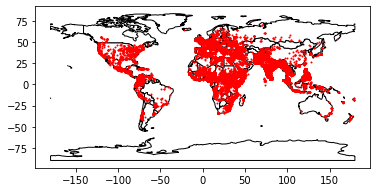

In [ ]:
import pandas as pd
!pip install --upgrade geopandas
import geopandas
#deben correr en otra celda un pip install geopandas para importar la librería
import matplotlib.pyplot as plt
from shapely.geometry import Point
long = df['longitude']
lat = df['latitude']
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
geometry = [Point(xy) for xy in zip(long,lat)]
base = world.plot(color='white', edgecolor='black')
geo_df = geopandas.GeoDataFrame(geometry = geometry)
geo_df.plot(ax=base, marker='o', color='red', markersize=1)

A continuación, se genera un _scatter plot_ que marca con un punto cada incidente en el mapa:

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df, lat=df.latitude, lon=df.longitude)
fig.write_html("scatter_geo_basico.html")

Es importante notar que este mapa realiza una carga importante sobre el sistema al renderizarlo, por lo que se recomienza luego de analizarlo cerrar u ocultar su celda.

In [ ]:
#%%html
#<iframe src="scatter_geo_basico.html" width="800" height="600" title="Choropleth map with plotly" style="border:none"></iframe>

También, a partir de estos datos, se genera un _heatmap_ mostrando los incidentes por país.

In [ ]:
import json

# GEOjson with country border data.
with open('countries.geojson', 'r') as fp:
    country_json = json.load(fp)
    
# Counts the number of incidents per country
df_count = df['country_txt'].value_counts(dropna=False).rename_axis('country').reset_index(name='count')
df_count['code'] = df_count.country.apply(lambda s: country_code_dict.get(s))

fig = px.choropleth(data_frame=df_count, 
                    locations='code',
                    locationmode='ISO-3',
                    geojson=country_json,
                    color='count',
                    hover_name='count',
                    color_continuous_scale=px.colors.sequential.amp)

fig.write_html("heat_country_basico.html")

FileNotFoundError: ignored

In [ ]:
from IPython.display import IFrame
IFrame(src='heat_country_basico.html', width=800, height=500)


Es directo observar que en Irak y el subcontinente Indio junto con Afganistán y Pakistán es donde se concentra la mayor cantidad de incidentes a la fecha, por lo que se revisará en mas detalle las 10 subdivisiones administrativas (provincias en el caso de Irak) con mayor cantidad de ataques.

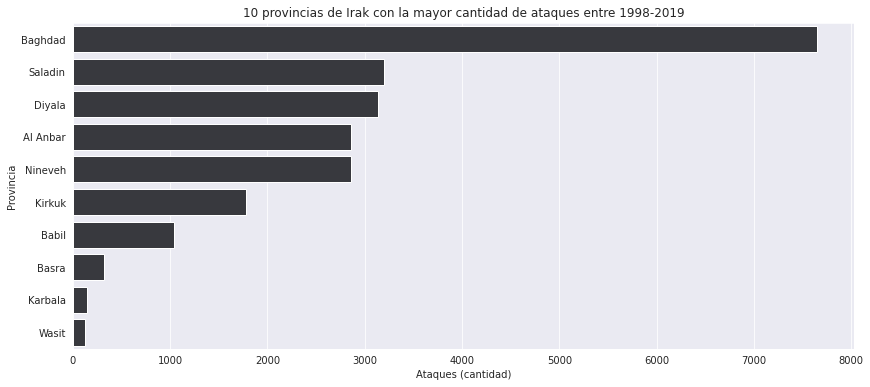

In [ ]:
df_iraq = df[df['country_txt'] == 'Iraq']
df_count_iraq = df_iraq['provstate'].value_counts(dropna=False).rename_axis('provstate').reset_index(name='count')

import seaborn as sns
import matplotlib.pyplot as plt

# Make a barplot
fig = plt.figure(figsize=(14, 6))
sns.set_style("darkgrid")
ax = sns.barplot(x="count", y="provstate", 
                 data=df_count_iraq.nlargest(10, 'count'),
                 color='#37383fff',
                )

ax.set(xlabel='Ataques (cantidad)', ylabel='Provincia')
ax.set(title='10 provincias de Irak con la mayor cantidad de ataques entre 1998-2019');

A continuación, se estudia como ha cambiado en el tiempo la frecuencia de bombardeos o explosiones, normalizados en función de la cantidad total de actos terroristas ocurridos cada año.

In [ ]:
df_bomb = df[df.attacktype1_txt == 'Bombing/Explosion']
df_bomb = df_bomb['timestamp'].apply(lambda s: s.year).value_counts(dropna=False).rename_axis('year').reset_index(name='frequency')


df_bomb['frequency'] = 100 * df_bomb['frequency'] / df['timestamp'].apply(lambda s: s.year).value_counts(dropna=False).rename_axis('year').reset_index(name='frequency')['frequency']
df_bomb = df_bomb.sort_values(by=['year'], ascending=True)

# Make a barplot
fig = plt.figure(figsize=(16, 5))
ax = sns.barplot(x="year", y="frequency", 
                 data=df_bomb,
                 color='#37383fff'
                );


ax.set(xlabel='Año', ylabel='Porcentaje de ocurrencia');
ax.set(title='Porcentaje de ataques terroristas de tipo bombardeo/explosion por año');

ax.yaxis.set_ticks([int(x) for x in ax.get_yticks()])
ax.set_yticklabels([str(int(x)) + '%' for x in ax.get_yticks()]);

AttributeError: ignored

Se observa que este tipo de ataque se mantuvo cerca del 50% del total de los ataques terroristas hasta el año 2013, donde se observa una tendencia a disminuir hasta el final de los datos (fines del 2019).

El siguiente gráfico muestra la cantidad de ataques terroristas por año en el mundo.

In [ ]:
df_attacks = df.groupby(df['timestamp'].apply(lambda s: s.year)).count()['eventid'].rename_axis('year').reset_index(name='frequency')

# Make a barplot
fig = plt.figure(figsize=(16, 8))
ax = sns.barplot(x="year", y="frequency", 
                 data=df_attacks, 
                 color='#37383fff'
                )

ax.set(xlabel='Año', ylabel='Frecuencia');
ax.set(title='Actos de terrorismo en el mundo por año');


Se observa que los actos terroristas durante los años 1998-2004 se mantienen en un rango conservado al rededor de los 1000-2000 por año, sin embargo en el 2005 comienzan a crecer, explosivamente desde el 2012 hasta un máximo en el 2014, alcanzando cercano a los 14000 actos durante todo el año, donde comienza a bajar dicha cantidad hasta el año 2019, donde acaba la muestra.

In [ ]:
df_2014 = df[df['timestamp'].apply(lambda s: s.year) == 2014].groupby('country_txt').count()['eventid'].rename_axis('country').reset_index(name='frequency')
df_2014 = df_2014.sort_values(by=['frequency'], ascending=False)

# Make a barplot
fig = plt.figure(figsize=(14, 6))
ax = sns.barplot(x="frequency", y="country", 
                 data=df_2014.nlargest(10, 'frequency'),
                 color='#37383fff'
                )

ax.set(xlabel='Ataques (cantidad)', ylabel='País')
ax.set(title='10 países con la mayor cantidad de ataques terroristas en 2014');

A continuación, se estudia como la cantidad de ataques terroristas en estos 10 países evoluciona al pasar los años.

In [ ]:
countries = list(df_2014.nlargest(10, 'frequency')['country'])
df['year'] = df['timestamp'].apply(lambda s: s.year)

df_2014_2019 = pd.DataFrame()
df_2014_2019['year'] = range(2014, 2019+1)
for country in countries:
    country_series = df[(2014 <= df.year) & (df.country_txt == country)].groupby(df.year).count()['eventid'].reset_index(name='frequency')
    df_2014_2019[country] = country_series['frequency']

# Make connected scatter plot
df_2014_2019.plot(kind='line', x='year', y=countries,
                  backend='matplotlib',
                  style='o-', figsize=(20, 10),
                  xlabel='Año', ylabel='Cantidad',
                  title='Ataques terroristas entre 2014-2019, para los 10 paises con más ataques en 2014.');

df = df.loc[:, df.columns!='year']

Se observa que gran parte de la disminución global de ataques terroristas es por la caída de las frecuencias de ataques tato en Irak como en Pakistan, disminuyendo entre 7 y 4 veces (aprox.) respectivamente.

Es posible observar también que estos 10 paises (a excepcion de Afganistán), terminan el 2019 con una cantidad de ataques entre 0 a 1000, cifra que se tiende a estabilizar a ese rango.

## Preguntas y problemas (Predecir)

opcional/Trivial => Hacer esas preguntas en el analisis exploratorio

Una vez viendo el panorama del dataset limpio y analizado, como grupo se generaron las siguientes preguntas e hipótesis que se estiman pueden ser respondidas y validadas con herramientas de minería de datos:


* ¿Es posible brindar la probabilidad de que un ataque terrorista suceda en función del lugar que se brinda? (Ejemplo, que probabilidad es que haya un ataque terrorista en medellin, Colombia en los proximos 5 años) [Nico Brandstetter]



* ¿Se puede establecer un mapa de calor de donde se concentran los atentados terroristas? ¿Y cómo ha variado este en el tiempo? [] opcional trivial, se puede hacer una animacion con cada
* ¿Existe alguna relación referente a la tasa de éxito de estos atentados frente a alguna de las características de la base de datos?[Seba Moreno, lista] opcional trivial

* ¿Cómo han variado en el tiempo los ataques terroristas en cuanto armas/tipo de ataque/objetivos? [Seba Moreno, lista] opcional trivial

* ¿Es posible establecer alguna relación entre zonas geográficas y si el ataque es doméstico o internacional? [Seba Moreno, haciendo] opcional trivial

* ¿Es posible que un cierto grupo de atributos pertenecientes a una instancia tengan una alta correlación con el acierto de un ataque?  [] opcional trivial

* ¿Existe alguna relación entre la zona del ataque y la fecha del atentado? [] investigar

* ¿Hay algún tipo de relación entre la zona geográfica del ataque con el motivo de éste? (ejemplo, ataques con índole religioso con más frecuentes en ciertos sectores) [] opcional trivial

* ¿Es posible, con los datos actuales, encontrar zonas de sospecha de aumento de actos terroristas? [Nicolas B.] Prediccion
* Verificar las áreas de dominio de distintos grupos a escala global. [] opcional trivial
* Existe relación entre el pais y el tipo de acto terrorista que ha sufrido de manera mas frecuente? [Nicolas] investigar 
* Patrón o tendencia de alguna nacionalidad en cometer ataques terristas sobre otro. [] clustering de ideologias y hacer pca/discutir en conjunto
* Comportamiento del terrorismo a lo largo de los años. [] se repite


* es posible caracterizar o predecir el tipo/lugar de ataque terrorista en base a las características que estos tienen? [Jordan] 
* Sería interesante saber si existen patrones que permitan asociar el tipo de ataque o lugar de donde fue, en base a las otras características del dataset [Jordan] 

* Para predecir el lugar, trataría de agrupar por continente o región del mundo en lugar de hacerlo por país/ciudad. [] aclaracion para todos

* Predecir/caracterizar el target que tenía por efecto el ataque/incidente []
* Ver la frecuencia de los tipos de ataques terroristas y sus subcategor []

Para el próximo hito se espera poder combinar este data set con algunas variables geopoliticas de los paises, como el sistema politico, el poder economico, las religiones e ideologías predominantes, hitos históricos que ocurrieron cercano al ataque terrorista, etc. [Nicolas I] investigar

##Contribución por cada integrante

* Augusto Aguayo B.: Limpieza del dataset, confeccion de gráficos, creación de repositorio web, análisis inicial del dataset.
* Nicolás Brandstetter N.: Redacción exploración de datos, edición de video, presentación, análisis inicial del dataset.
* Nicolás Isla F.: Presentación, análisis inicial del dataset, formulación de preguntas.
* Sebastián Moreno M.: Análisis inicial del dataset, formulación de preguntas.
* Jordan Pérez D.: Presentación, análisis inicial del dataset.

#Hito 2

##Propuesta metodológica experimental inicial
- Respondiendo a ¿Es posible obtener la probabilidad de que un ataque terrorista suceda en función del lugar que se brinda?, lo primero es aclarar que el tipo de pregunta a responder sería por ejemplo que probabilidad es que haya un ataque terrorista en medellin, Colombia en los proximos 5 años. Desglosando lo previamente dicho, la pregunta se compone de una ubicación y una extensión temporal. Una propuesta metodológica para resolver esta pregunta es generar una matriz de una dimensionalidad nxm a estimar, con el fin de representar un mapa del mundo. Cada zona será tendrá una probabilidad de un ataque terrorista en función de cuantos ataques terroristas han ocurrido en sus cercanias. Así, cada ataque tendrá un peso normalizado (entre 0-1) en donde cada ataque tendrá un peso maximo de 1 si es que sucedió justo en la ubicación que se consulta, y el resto de ataques tendrá un peso menor a medida que se alejan de la zona, de esta forma, la probabilidad de que ocurra un incidente estará en función de los pesos de cada ataque que tuvo en sus cercanias. Estos pesos serán ajustados mediante un analisis del proceso exploratorio, para bindar una métrica razonable a la hora de justificar el algoritmo que determine los pesos de cada ataque en función de su ubicación. Un segundo parámetro que tendrá cada ubicación, será relacionado a la periodicidad en la que los ataques terroristas ocurren en cada zona, generando una segunda matriz y mapa visual en donde cada zona tendrá un multiplicador entre 0-1, en donde una zona con 1 es una zona con muchos ataques terroristas en un corto periodo de tiempo.

## Resultado preliminar

Resumen comentarios para mejorar Hito 1

Motivación:
*  Explicar mas el terrorismo, agregar ejemplos, ser mas explicito

Preguntas/problemáticas:
* Explicitar la limíeza de datos según lo que se quiere lograr, ejemplo, ¿por qué quitar ciertas columnas o mantener otras?¿A que tipo de terrorismo vamos dirigido?

* No mezclar problemática con motivación

Descripción datos:

* Pequeño error de +1 entre la diapo de "algunos porcentajes" y "exploración de datos"
* Dejar matrices de tendencias centrales en 2-3cifras decimales
* Marcar cifras de interés para mejorar la visualización
* Explicar dataset, atributos, etc
* Error en la interpretacion de la correlacion: si atributo 1 y Atributo 2 tienen una correlacion de 0;7, no es decir que atributo 1 tiene 70% de suerte de ser atributo 2, solo es decir que estan muy vinculados.
* Clarificar significancia de los atributos
* Matriz de correlación como gráfico habría sido mejor
* No poner directamente lo que retorna el colab en modo oscuro.

Presentación:
* Presentación descoordinada 
* Ver a las personas que hablan


## Comentarios auxiliar

Análisis exploratorio:
* Segregar variables. Por ejemplo, ver la frecuencia por lugar geográfico y por tipo de atentado. Probablemente no será lo mismo contar la cantidad en iraq para cierto ataque vs ucrania. Por ello, sugiero ir desglozando ese tipo de cosas en múltiples variables, que fácilmente podrían hacer con un gráfico de barras.

Preguntas:
* Preguntas relacionadas a mayor entendimiento: eso lo pueden hacer con un conteo de frecuencia filtrando el dataset por las variables necesarias y calcular alguna correlación. 
* Pregunta relacionadas a generar nueva información: al parecer pasa lo mismo que lo anterior. Otras: un gráfico (similar al del informe) pero dividido entre armas u objetivo.
* Para predecir el lugar, trataría de agrupar por continente o región del mundo en lugar de hacerlo por país/ciudad.
* Sería interesante saber si existen patrones que permitan asociar el tipo de ataque o lugar de donde fue, en base a las otras características del dataset
* Predecir/caracterizar el target que tenía por efecto el ataque/incidente
* Ver la frecuencia de los tipos de ataques terroristas y sus subcategor


Mensaje Personal:
Muy buena motivación para introducir el problema a resolver. Además me gustó bastante la presentación en base a cómo contaron la historia. Respecto al análisis exploratorio, creo que estuvo bien tener una visión global de problema viendo diferentes atributos como frecuencia por lugar geográfico, año, etc. Algo que extrañe en este punto es que pudieran segregar estas mismas variables en otra. Por ejemplo, ver la frecuencia por lugar geográfico y por tipo de atentado. Probablemente no será lo mismo contar la cantidad en iraq para cierto ataque vs ucrania. Por ello, sugiero ir desglozando ese tipo de cosas en múltiples variables, que fácilmente podrían hacer con un gráfico de barras. Respecto a las preguntas, creo que hay que mejorarlas bastante pues muchas de ellas pueden ser respondidad trivialmente en el análisis exploratorio. Para ello, me enfocaré en las que aparecen en la ppt. Preguntas relacionadas a mayor entendimiento: eso lo pueden hacer con un conteo de frecuencia filtrando el dataset por las variables necesarias y calcular alguna correlación. Pregunta relacionadas a generar nueva información: al parecer pasa lo mismo que lo anterior. Otras: un gráfico (similar al del informe) pero dividido entre armas u objetivo.
En base a esto, propongo re-orientar las preguntas a algo como: es posible caracterizar o predecir el tipo/lugar de ataque terrorista en base a las características que estos tienen? Creo que para predecir el lugar, trataría de agrupar por continente o región del mundo en lugar de hacerlo por país/ciudad. Pienso que sería interesante saber si existen patrones que permitan asociar el tipo de ataque o lugar de donde fue, en base a las otras características del dataset. También se podría predecir/caracterizar el target que tenía por efecto el ataque/incidente. Una cosa que también podrían analizar a priori, es ver la frecuencia de los tipos de ataques terroristas y sus subcategorías. Quizás si uno piensa que tiene suficientes subcategorías, la predicción o descripción de estas también sería interesante analizar.




#### Pregunta: ¿Existe relación alguna entre el tipo de pais y los ataques terrorista?

>Respuesta: Para el hito 3 se espera poder combinar este dataset con variables geologicas, sociales y politicas de los diversos paises. De esta manera, se busca entender el contexto general que produce que algunos paises sean mas propensos a cierto tipo de ataques, a su vez tambien se busca encontrar que factores sociales pueden producir una mayor tasa de ataques, y por ultimo que factores se relacionan con el exito del ataque.



##### Metodologia

Para resolver esta pregunta se añadirá la base de datos World Development Indicators, que posee cientos de indicadores sociales y políticos desde los años 1960 hasta 2021. Donde primero se realizará una limpieza de indicadores considerando los que posean más información y sean de mayor importancia a la hora de clasificar un país. Ejemplo de lo anterior pueden ser los índices de ingreso per cápita, el ingreso nacional, daños producidos por el dióxido de carbono, etc. 

Luego se calcularán diversos atributos pertenecientes al dataset original, algunos ejemplos pueden ser la cantidad de atentados terroristas por año por pais, tasa de exito por año por pais, promedio/total de personas que resultaron heridas/asesinadas por atentado/año por pais, etc. Lo que se busca con estos calculos es caracterizar a traves de los años como han sido los ataques terroristas y cual es su tendencia.

Finalmente, complementando ambas bases y atributos, se espera encontrar una explicacion, antecedentes o motivos que hace que se genere este fenomeno. De esta forma, comparando los paises que han sufrido de ataques terroristas se podran obtener que indicadores sociales y políticos 
son los mas relevantes en cuanto a este fenomeno, una forma de lograr lo anterior es mediante un analisis de correlación entre los indicadores sociales con respecto a la caracterizacion del ataque. Por otra parte, ya que se tiene la información anual se podra estudiar el comportamiento temporal y cuál es la tendencia de los atributos en los países que ha presentado una gran actividad terrorista, por lo que también se podría explicar el detonante social que produjo aquel acto. 

En caso de no encontrar resultados significativos, se realizara un análisis mas simple solo teniendo en cuenta factores mas generales como por ejemplo tipo de gobierno, ingreso PIB, religiones, etc.

